4.1 Generate data from data generator 2d.py.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline
np.random.seed(0)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut


In [76]:
import numpy as np
import pickle
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

pickle.dump(X,open('dataX.pickle','wb'))
pickle.dump(y,open('dataY.pickle','wb'))

 Split the data into test and train (20%:80%).

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 101)

In [78]:
print X_train.shape

(240L, 2L)


In [79]:
print X_test.shape

(60L, 2L)


In [80]:
print y_train.shape

(240L,)


In [81]:
print y_test.shape

(60L,)


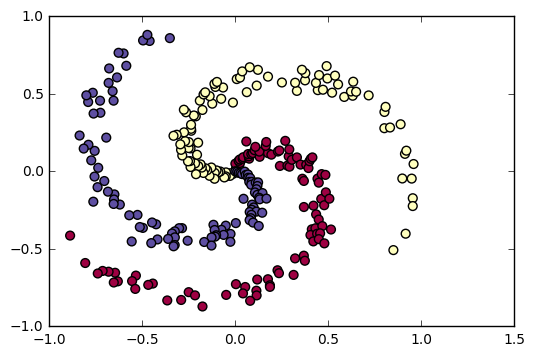

In [82]:
#defining some variables
D = X.shape[1] #Number of features
K = max(y)+1 #Number of classes assuming class index starts from 0

#Plot the data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

Build a linear classifer assuming the multiclass logistic loss and an l2 regularization
for the weights only. Report the prediction accuracy on the training data and the
test data.

In [84]:
# Linear model

# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
p = 1e-3 # regularization strength

#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-0 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.

# gradient descent loop
for i in xrange(15000):
  
    # evaluate class scores, [N x K]
    scores = np.dot(X_train, W) + b 
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y_train])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*p*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print "iteration %d: loss %f" % (i, loss)
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y_train] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X_train.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += p*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    


iteration 0: loss 1.100546
iteration 1000: loss 0.794632
iteration 2000: loss 0.794632
iteration 3000: loss 0.794632
iteration 4000: loss 0.794632
iteration 5000: loss 0.794632
iteration 6000: loss 0.794632
iteration 7000: loss 0.794632
iteration 8000: loss 0.794632
iteration 9000: loss 0.794632
iteration 10000: loss 0.794632
iteration 11000: loss 0.794632
iteration 12000: loss 0.794632
iteration 13000: loss 0.794632
iteration 14000: loss 0.794632


In [85]:
# Post-training: evaluate training set accuracy

scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'train accuracy: %.2f' % (np.mean(predicted_class == y_train))


# Post-training: evaluate test set accuracy

scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'test accuracy: %.2f' % (np.mean(predicted_class == y_test))

train accuracy: 0.48
test accuracy: 0.55


Introduce a cross validation scheme and justify your choice. What is the validation
accuracy compare to the test accuracy.

In [86]:
kf = KFold(n_splits=5,random_state = None,shuffle = True)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X[train_index], X[test_index]
    y_train1, y_test1 = y[train_index], y[test_index]
    print X_train1.shape
    print X_test1.shape


(240L, 2L)
(60L, 2L)
(240L, 2L)
(60L, 2L)
(240L, 2L)
(60L, 2L)
(240L, 2L)
(60L, 2L)
(240L, 2L)
(60L, 2L)


In [87]:
60/300

0.2

In [104]:
kf = KFold(n_splits=10,random_state = None,shuffle = True)
kf.get_n_splits(X_train)
print(kf)  
validation_accuracy = []
cnt=0
for train_index, test_index in kf.split(X_train):
    cnt=cnt+1
    print "\n {} fold".format(cnt)
    
    
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    print X_train1.shape
    print X_test1.shape
    num_examples_cv = len(y_train1)
    
    for i in xrange(15000):
  
        # evaluate class scores, [N x K]
        scores = np.dot(X_train1, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples_cv),y_train1])
        data_loss = np.sum(corect_logprobs)/num_examples_cv
        reg_loss = 0.5*p*np.sum(W*W)
        loss = data_loss + reg_loss
#         if i % 1000 == 0:
#             print "iteration %d: loss %f" % (i, loss)

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples_cv),y_train1] -= 1
        dscores /= num_examples_cv

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X_train1.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += p*W # regularization gradient

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        
    # Post-training: evaluate training set accuracy

    scores = np.dot(X_train1, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print 'train accuracy: %.2f' % (np.mean(predicted_class == y_train1))


    # Post-training: evaluate val set accuracy
    
    scores = np.dot(X_test1, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print 'validation accuracy: %.2f' % (np.mean(predicted_class == y_test1))
    
    validation_accuracy.append(np.mean(predicted_class == y_test1))
    
    W_new = W
    
print " Mean validation accuracy of the 10-fold cross validation is : {} ".format(np.mean(validation_accuracy))

print "Expected accuracy on the test data set could be close to {} ".format(np.mean(validation_accuracy))
    
# Post-training: evaluate val set accuracy
    
scores = np.dot(X_test, W_new) + b
predicted_class = np.argmax(scores, axis=1)
print 'Test Accuracy : %.2f' % (np.mean(predicted_class == y_test))

    
    

KFold(n_splits=10, random_state=None, shuffle=True)

 1 fold
(216L, 2L)
(24L, 2L)
train accuracy: 0.48
validation accuracy: 0.46

 2 fold
(216L, 2L)
(24L, 2L)
train accuracy: 0.47
validation accuracy: 0.50

 3 fold
(216L, 2L)
(24L, 2L)
train accuracy: 0.50
validation accuracy: 0.33

 4 fold
(216L, 2L)
(24L, 2L)
train accuracy: 0.48
validation accuracy: 0.54

 5 fold
(216L, 2L)
(24L, 2L)
train accuracy: 0.49
validation accuracy: 0.50

 6 fold
(216L, 2L)
(24L, 2L)
train accuracy: 0.47
validation accuracy: 0.67

 7 fold
(216L, 2L)
(24L, 2L)
train accuracy: 0.47
validation accuracy: 0.46

 8 fold
(216L, 2L)
(24L, 2L)
train accuracy: 0.49
validation accuracy: 0.46

 9 fold
(216L, 2L)
(24L, 2L)
train accuracy: 0.49
validation accuracy: 0.46

 10 fold
(216L, 2L)
(24L, 2L)
train accuracy: 0.49
validation accuracy: 0.33
 Mean validation accuracy of the 10-fold cross validation is : 0.470833333333 
Expected accuracy on the test data set could be close to 0.470833333333 
Test Accuracy : 0.55


What is the sensitivity of the model's performance to different learning rates and
the number of gradient descent iterations. Describe via suitable plots.

In [108]:

# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
p = 1e-3 # regularization strength

#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
# step_size = 1e-0 #Also called learning rate

step_size = [0.001,0.01,0.1,0.5,1,2,5,10,15,20,25,30,35,40,45,50,55,60,70,80,90,100,120,140,160]
d1 = {}
d2 = {}
train_accuracy = []
test_accuracy = []

for a in step_size:

    # gradient descent loop
    for i in xrange(1500):
  
        # evaluate class scores, [N x K]
        scores = np.dot(X_train, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*p*np.sum(W*W)
        loss = data_loss + reg_loss
#         if i % 1000 == 0:
#             print "iteration %d: loss %f" % (i, loss)

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += p*W # regularization gradient

        # perform a parameter update
        W += - a * dW
        b += - a * db

    # Post-training: evaluate training set accuracy

    scores = np.dot(X_train, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print "-"*10
    print 'step size is {}'.format(a)
    print 'train accuracy: %.2f' % (np.mean(predicted_class == y_train))
    d1[a] = np.mean((predicted_class == y_train))
    
    train_accuracy.append(np.mean(predicted_class == y_train))
    
    scores = np.dot(X_test, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print 'step size is {}'.format(a)
    print 'test accuracy: %.2f' % (np.mean(predicted_class == y_test))
    d2[a] = np.mean((predicted_class == y_test))

    test_accuracy.append(np.mean(predicted_class == y_test))

print d1
print d2

----------
step size is 0.001
train accuracy: 0.58
step size is 0.001
test accuracy: 0.52
----------
step size is 0.01
train accuracy: 0.52
step size is 0.01
test accuracy: 0.52
----------
step size is 0.1
train accuracy: 0.48
step size is 0.1
test accuracy: 0.55
----------
step size is 0.5
train accuracy: 0.48
step size is 0.5
test accuracy: 0.55
----------
step size is 1
train accuracy: 0.48
step size is 1
test accuracy: 0.55
----------
step size is 2
train accuracy: 0.48
step size is 2
test accuracy: 0.55
----------
step size is 5
train accuracy: 0.48
step size is 5
test accuracy: 0.55
----------
step size is 10
train accuracy: 0.55
step size is 10
test accuracy: 0.57
----------
step size is 15
train accuracy: 0.50
step size is 15
test accuracy: 0.60
----------
step size is 20
train accuracy: 0.53
step size is 20
test accuracy: 0.58
----------
step size is 25
train accuracy: 0.52
step size is 25
test accuracy: 0.65
----------
step size is 30
train accuracy: 0.45
step size is 30
test

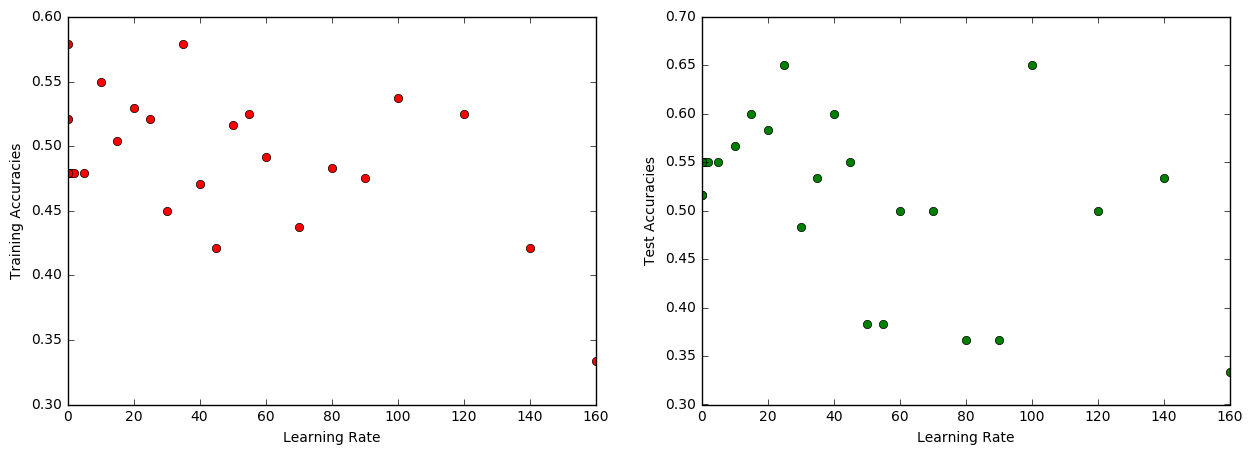

In [114]:
fig,ax = plt.subplots(1,2,figsize = (15,5))


for key,value in d1.items():
    ax[0].plot(key,value,'r',marker = 'o',linestyle = '')

for key,value in d2.items():
    ax[1].plot(key,value,'g',marker = 'o',linestyle = '')

ax[0].set_xlabel("Learning Rate")
ax[0].set_ylabel("Training Accuracies")
ax[1].set_xlabel("Learning Rate")
ax[1].set_ylabel("Test Accuracies")

plt.show()

In [119]:
# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
p = 1e-3 # regularization strength

#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-0 #Also called learning rate

d3 = {}
d4 = {}

iter_list = [10,30,50,100,150,200,400,600,800,1000,1200,1400,1600,1800,2000]
# gradient descent loop

for j in iter_list:
    
    for i in xrange(j+1):


        # evaluate class scores, [N x K]
        scores = np.dot(X_train, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*p*np.sum(W*W)
        loss = data_loss + reg_loss

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += p*W # regularization gradient

        # perform a parameter update
        W += - step_size * dW
        b += - step_size * db

    # Post-training: evaluate training set accuracy

    scores = np.dot(X_train, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print "-"*10
    print 'step size is {}'.format(a)
    print 'train accuracy: %.2f' % (np.mean(predicted_class == y_train))
    d3[i] = np.mean((predicted_class == y_train))
    
    # Post-training: evaluate test set accuracy

    scores = np.dot(X_test, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print 'step size is {}'.format(a)
    print 'test accuracy: %.2f' % (np.mean(predicted_class == y_test))
    d4[i] = np.mean((predicted_class == y_test))


print d3
print d4


----------
step size is 160
train accuracy: 0.55
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.49
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.48
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.48
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.48
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.48
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.48
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.48
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.48
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.48
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.48
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.48
step 

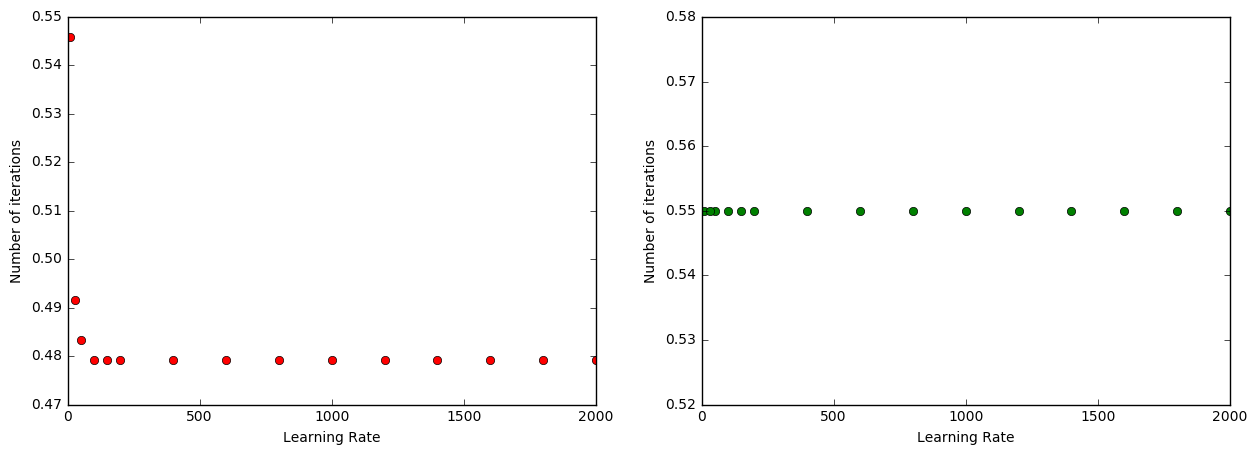

In [120]:
fig,ax = plt.subplots(1,2,figsize = (15,5))


for key,value in d3.items():
    ax[0].plot(key,value,'r',marker = 'o',linestyle = '')

for key,value in d4.items():
    ax[1].plot(key,value,'g',marker = 'o',linestyle = '')

ax[0].set_xlabel("Number of iterations")
ax[0].set_ylabel("Training Accuracy")
ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("Test Accuracy")

plt.show()

What is the sensitivity of the model's performance to different regularization pa-
rameter values. Find the best regularization parameter using an exhaustive search
procedure. Describe your choice via suitable plots. What is the performance differ-
ence between using regularization and no regularization?

In [124]:
# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
# p = 1e-3 # regularization strength

#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-0 #Also called learning rate

d5 = {}
d6 = {}

# iter_list = [10,30,50,100,150,200,400,600,800,1000,1200,1400,1600,1800,2000]
# gradient descent loop
p = np.arange(0,10,0.1)
for j in p:
    
    for i in xrange(15000):


        # evaluate class scores, [N x K]
        scores = np.dot(X_train, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = j*np.sum(W*W) #I have removed 0.5 before the regularization parameter
        loss = data_loss + reg_loss

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += j*W # regularization gradient

        # perform a parameter update
        W += - step_size * dW
        b += - step_size * db

    # Post-training: evaluate training set accuracy

    scores = np.dot(X_train, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print "-"*10
    print 'step size is {}'.format(a)
    print 'train accuracy: %.2f' % (np.mean(predicted_class == y_train))
    d5[j] = np.mean((predicted_class == y_train))
    
    # Post-training: evaluate test set accuracy

    scores = np.dot(X_test, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print 'step size is {}'.format(a)
    print 'test accuracy: %.2f' % (np.mean(predicted_class == y_test))
    d6[j] = np.mean((predicted_class == y_test))


print np.mean(d5.values())
print np.mean(d6.values())


----------
step size is 160
train accuracy: 0.48
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.57
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.58
step size is 160
test accuracy: 0.52
----------
step size is 160
train accuracy: 0.57
step size is 160
test accuracy: 0.48
----------
step size is 160
train accuracy: 0.56
step size is 160
test accuracy: 0.45
----------
step size is 160
train accuracy: 0.53
step size is 160
test accuracy: 0.45
----------
step size is 160
train accuracy: 0.52
step size is 160
test accuracy: 0.43
----------
step size is 160
train accuracy: 0.50
step size is 160
test accuracy: 0.38
----------
step size is 160
train accuracy: 0.49
step size is 160
test accuracy: 0.37
----------
step size is 160
train accuracy: 0.48
step size is 160
test accuracy: 0.37
----------
step size is 160
train accuracy: 0.47
step size is 160
test accuracy: 0.37
----------
step size is 160
train accuracy: 0.46
step 

C:\Users\vaish\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: RuntimeWarning: divide by zero encountered in log
C:\Users\vaish\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: overflow encountered in exp
C:\Users\vaish\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: invalid value encountered in true_divide


----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step 

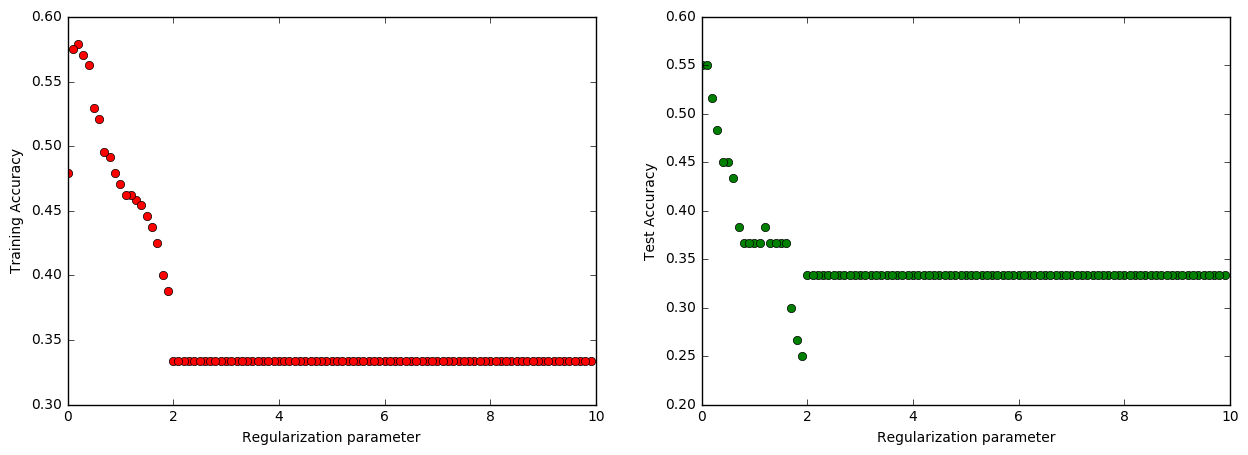

In [125]:
# range of the regularisation parameter is considered between 0 t0 10 with increments of 0.1

fig,ax = plt.subplots(1,2,figsize = (15,5))


for key,value in d5.items():
    ax[0].plot(key,value,'r',marker = 'o',linestyle = '')

for key,value in d6.items():
    ax[1].plot(key,value,'g',marker = 'o',linestyle = '')

ax[0].set_xlabel("Regularization parameter")
ax[0].set_ylabel("Training Accuracy")
ax[1].set_xlabel("Regularization parameter")
ax[1].set_ylabel("Test Accuracy")

plt.show()

what are my results if I multiply the regularization loss with 0.5?

In [126]:
# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
# p = 1e-3 # regularization strength

#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-0 #Also called learning rate

d5 = {}
d6 = {}

# iter_list = [10,30,50,100,150,200,400,600,800,1000,1200,1400,1600,1800,2000]
# gradient descent loop
p = np.arange(0,10,0.1)
for j in p:
    
    for i in xrange(15000):


        # evaluate class scores, [N x K]
        scores = np.dot(X_train, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*j*np.sum(W*W) #I have removed 0.5 before the regularization parameter
        loss = data_loss + reg_loss

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += j*W # regularization gradient

        # perform a parameter update
        W += - step_size * dW
        b += - step_size * db

    # Post-training: evaluate training set accuracy

    scores = np.dot(X_train, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print "-"*10
    print 'step size is {}'.format(a)
    print 'train accuracy: %.2f' % (np.mean(predicted_class == y_train))
    d5[j] = np.mean((predicted_class == y_train))
    
    # Post-training: evaluate test set accuracy

    scores = np.dot(X_test, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print 'step size is {}'.format(a)
    print 'test accuracy: %.2f' % (np.mean(predicted_class == y_test))
    d6[j] = np.mean((predicted_class == y_test))


print np.mean(d5.values())
print np.mean(d6.values())


----------
step size is 160
train accuracy: 0.48
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.57
step size is 160
test accuracy: 0.55
----------
step size is 160
train accuracy: 0.58
step size is 160
test accuracy: 0.52
----------
step size is 160
train accuracy: 0.57
step size is 160
test accuracy: 0.48
----------
step size is 160
train accuracy: 0.56
step size is 160
test accuracy: 0.45
----------
step size is 160
train accuracy: 0.53
step size is 160
test accuracy: 0.45
----------
step size is 160
train accuracy: 0.52
step size is 160
test accuracy: 0.43
----------
step size is 160
train accuracy: 0.50
step size is 160
test accuracy: 0.38
----------
step size is 160
train accuracy: 0.49
step size is 160
test accuracy: 0.37
----------
step size is 160
train accuracy: 0.48
step size is 160
test accuracy: 0.37
----------
step size is 160
train accuracy: 0.47
step size is 160
test accuracy: 0.37
----------
step size is 160
train accuracy: 0.46
step 

C:\Users\vaish\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: RuntimeWarning: divide by zero encountered in log
C:\Users\vaish\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: overflow encountered in exp
C:\Users\vaish\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: invalid value encountered in true_divide


----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step size is 160
test accuracy: 0.33
----------
step size is 160
train accuracy: 0.33
step 

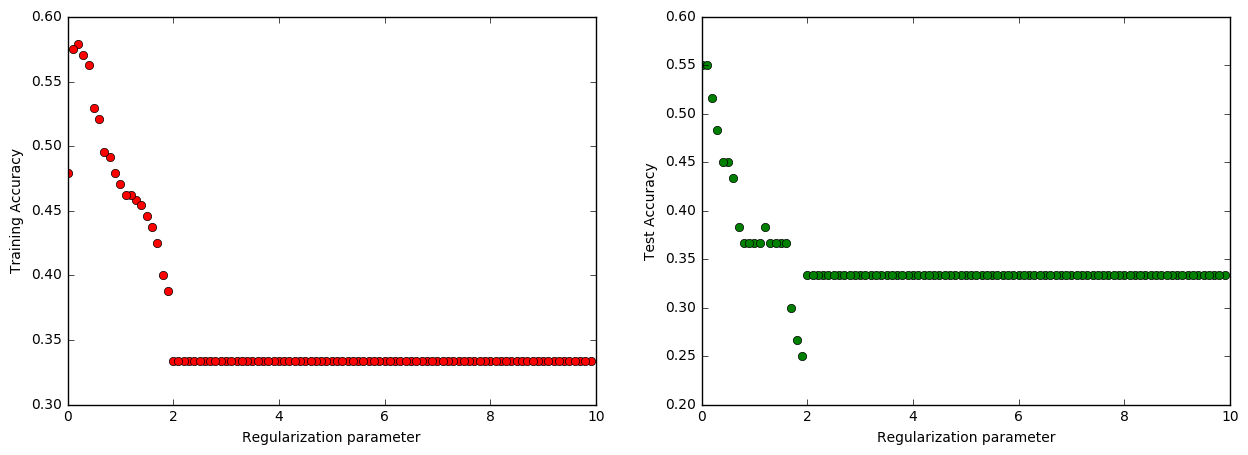

In [127]:
# range of the regularisation parameter is considered between 0 t0 10 with increments of 0.1 and the regularization loss is 
#multiplied by 0.5

fig,ax = plt.subplots(1,2,figsize = (15,5))


for key,value in d5.items():
    ax[0].plot(key,value,'r',marker = 'o',linestyle = '')

for key,value in d6.items():
    ax[1].plot(key,value,'g',marker = 'o',linestyle = '')

ax[0].set_xlabel("Regularization parameter")
ax[0].set_ylabel("Training Accuracy")
ax[1].set_xlabel("Regularization parameter")
ax[1].set_ylabel("Test Accuracy")

plt.show()

In [128]:
#varying from 10 to 50 with 0.5 increments

# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
# p = 1e-3 # regularization strength

#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-0 #Also called learning rate

d5 = {}
d6 = {}

# iter_list = [10,30,50,100,150,200,400,600,800,1000,1200,1400,1600,1800,2000]
# gradient descent loop
p = np.arange(10,50,0.5)
for j in p:
    
    for i in xrange(15000):


        # evaluate class scores, [N x K]
        scores = np.dot(X_train, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*j*np.sum(W*W) #I have removed 0.5 before the regularization parameter
        loss = data_loss + reg_loss

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += j*W # regularization gradient

        # perform a parameter update
        W += - step_size * dW
        b += - step_size * db

    # Post-training: evaluate training set accuracy

    scores = np.dot(X_train, W) + b
    predicted_class = np.argmax(scores, axis=1)
#     print "-"*10
#     print 'step size is {}'.format(a)
#     print 'train accuracy: %.2f' % (np.mean(predicted_class == y_train))
    d5[j] = np.mean((predicted_class == y_train))
    
    # Post-training: evaluate test set accuracy

    scores = np.dot(X_test, W) + b
    predicted_class = np.argmax(scores, axis=1)
#     print 'step size is {}'.format(a)
#     print 'test accuracy: %.2f' % (np.mean(predicted_class == y_test))
    d6[j] = np.mean((predicted_class == y_test))


print np.mean(d5.values())
print np.mean(d6.values())


C:\Users\vaish\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: overflow encountered in exp
C:\Users\vaish\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: invalid value encountered in true_divide
C:\Users\vaish\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:37: RuntimeWarning: divide by zero encountered in log


0.333333333333
0.333333333333


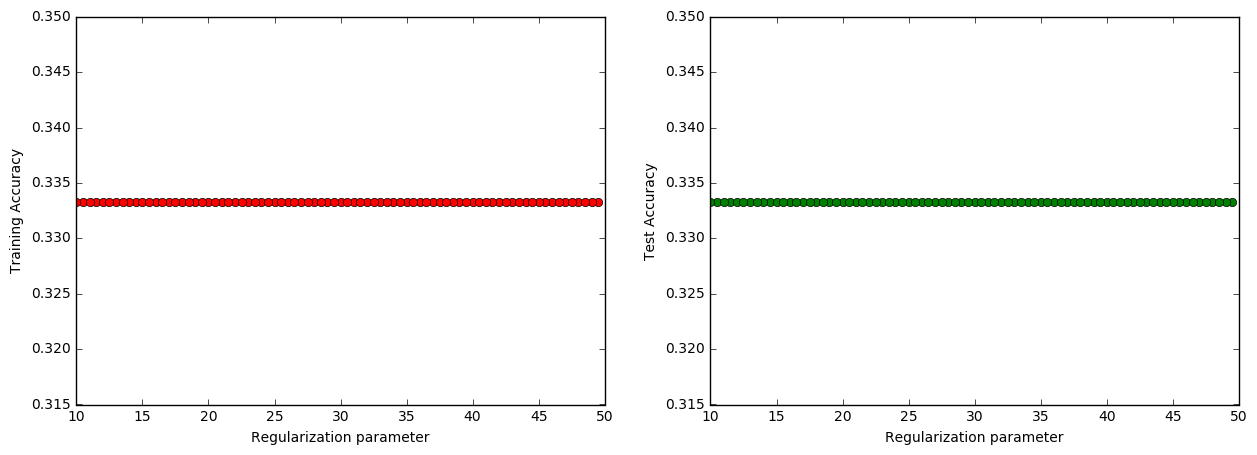

In [129]:
# range of the regularisation parameter is considered between 0 t0 10 with increments of 0.1 and the regularization loss is 
#multiplied by 0.5

fig,ax = plt.subplots(1,2,figsize = (15,5))


for key,value in d5.items():
    ax[0].plot(key,value,'r',marker = 'o',linestyle = '')

for key,value in d6.items():
    ax[1].plot(key,value,'g',marker = 'o',linestyle = '')

ax[0].set_xlabel("Regularization parameter")
ax[0].set_ylabel("Training Accuracy")
ax[1].set_xlabel("Regularization parameter")
ax[1].set_ylabel("Test Accuracy")

plt.show()

In [142]:
#varying p

# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
# p = 1e-3 # regularization strength

#Perform batch SGD using backprop

#For simplicity we will take the batch size to be the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-0 #Also called learning rate

d5 = {}
d6 = {}

# iter_list = [10,30,50,100,150,200,400,600,800,1000,1200,1400,1600,1800,2000]
# gradient descent loop
p = np.arange(1e-4,1,1e-2)
for j in p:
    
    for i in xrange(15000):


        # evaluate class scores, [N x K]
        scores = np.dot(X_train, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*j*np.sum(W*W) #I have removed 0.5 before the regularization parameter
        loss = data_loss + reg_loss

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += j*W # regularization gradient

        # perform a parameter update
        W += - step_size * dW
        b += - step_size * db

    # Post-training: evaluate training set accuracy

    scores = np.dot(X_train, W) + b
    predicted_class = np.argmax(scores, axis=1)
#     print "-"*10
#     print 'step size is {}'.format(a)
#     print 'train accuracy: %.2f' % (np.mean(predicted_class == y_train))
    d5[j] = np.mean((predicted_class == y_train))
    
    # Post-training: evaluate test set accuracy

    scores = np.dot(X_test, W) + b
    predicted_class = np.argmax(scores, axis=1)
#     print 'step size is {}'.format(a)
#     print 'test accuracy: %.2f' % (np.mean(predicted_class == y_test))
    d6[j] = np.mean((predicted_class == y_test))


print np.mean(d5.values())
print np.mean(d6.values())


0.528583333333
0.446666666667


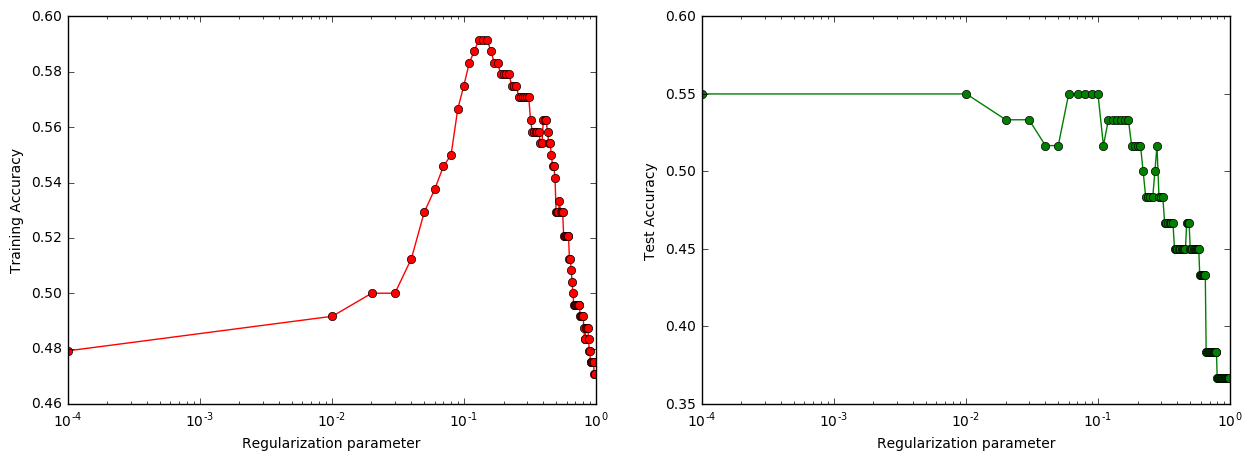

In [148]:
# range of the regularisation parameter is considered between 0 t0 10 with increments of 0.1 and the regularization loss is 
#multiplied by 0.5

fig,ax = plt.subplots(1,2,figsize = (15,5))

L=[[key,value] for key,value in d5.items()]
L.sort(key= lambda x: x[0])
L=np.array(L)
# for key,value in d5.items():
ax[0].semilogx(L[:,0],L[:,1],'r',marker = 'o',linestyle = '-')


L=[[key,value] for key,value in d6.items()]
L.sort(key= lambda x: x[0])
L=np.array(L)

# for key,value in d6.items():
ax[1].semilogx(L[:,0],L[:,1],'g',marker = 'o',linestyle = '-')

ax[0].set_xlabel("Regularization parameter")
ax[0].set_ylabel("Training Accuracy")
ax[1].set_xlabel("Regularization parameter")
ax[1].set_ylabel("Test Accuracy")


plt.show()

What is the sensitivity of the model's performance with respect to a different test
train split (50%:50%).

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, random_state = 101)

In [150]:
# Linear model

# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
p = 1e-3 # regularization strength

#Perform batch SGD using backprop

#batch size is the the same as number of examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-0 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.

# gradient descent loop
for i in xrange(15000):
  
    # evaluate class scores, [N x K]
    scores = np.dot(X_train, W) + b 
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y_train])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*p*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print "iteration %d: loss %f" % (i, loss)
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y_train] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X_train.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += p*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    


iteration 0: loss 1.096620
iteration 1000: loss 0.813869
iteration 2000: loss 0.813869
iteration 3000: loss 0.813869
iteration 4000: loss 0.813869
iteration 5000: loss 0.813869
iteration 6000: loss 0.813869
iteration 7000: loss 0.813869
iteration 8000: loss 0.813869
iteration 9000: loss 0.813869
iteration 10000: loss 0.813869
iteration 11000: loss 0.813869
iteration 12000: loss 0.813869
iteration 13000: loss 0.813869
iteration 14000: loss 0.813869


In [151]:
# Post-training: evaluate training set accuracy

scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'train accuracy: %.2f' % (np.mean(predicted_class == y_train))


# Post-training: evaluate test set accuracy

scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'test accuracy: %.2f' % (np.mean(predicted_class == y_test))

train accuracy: 0.45
test accuracy: 0.52


In [ ]:
#need to try gradient descent with different batch sizes